<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

`network` contains functions to arrange and analyze glycans in the context of networks. In such a network, each node represents a glycan and edges represent, for instance, their connection via a biosynthetic step. It should be noted, since `glycowork` treats glycans as molecular graphs, that these networks represent hierarchical graphs, with the network being one graph and each node within the network also a graph. `network` contains the following modules:

- `biosynthesis` contains functions to construct and analyze biosynthetic glycan networks
- `evolution` contains functions to compare (taxonomic) groups as to their glycan repertoires

## biosynthesis
>constructing and analyzing biosynthetic glycan networks

In [1]:
#| echo: false
#| output: asis
show_doc(construct_network)

---

### construct_network

>      construct_network (glycans, allowed_ptms={'OS', 'OAc', 'OP', '6P', '4Ac',
>                         '1P', '3S', '9Ac', '6S', '3P'}, edge_type='monolink',
>                         permitted_roots=None, abundances=[])

construct a glycan biosynthetic network

| Arguments:
| :-
| glycans (list): list of glycans in IUPAC-condensed format
| allowed_ptms (set): list of PTMs to consider
| edge_type (string): indicates whether edges represent monosaccharides ('monosaccharide'), monosaccharide(linkage) ('monolink'), or enzyme catalyzing the reaction ('enzyme'); default:'monolink'
| permitted_roots (set): which nodes should be considered as roots; default:will be inferred
| abundances (list): optional list of abundances, in the same order as glycans; default:empty list

| Returns:
| :-
| Returns a networkx object of the network

In [ ]:
glycans = ["Gal(b1-4)Glc-ol", "GlcNAc(b1-3)Gal(b1-4)Glc-ol",
           "GlcNAc6S(b1-3)Gal(b1-4)Glc-ol",
           "Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)Glc-ol", "Fuc(a1-2)Gal(b1-4)Glc-ol",
          "Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-3)[Gal(b1-3)GlcNAc(b1-6)]Gal(b1-4)Glc-ol"]
network = construct_network(glycans)
network.nodes()

NodeView(('Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-3)[Gal(b1-3)GlcNAc(b1-6)]Gal(b1-4)Glc-ol', 'Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)Glc-ol', 'GlcNAc6S(b1-3)Gal(b1-4)Glc-ol', 'GlcNAc(b1-3)Gal(b1-4)Glc-ol', 'Fuc(a1-2)Gal(b1-4)Glc-ol', 'Gal(b1-4)Glc-ol', 'Gal(b1-4)GlcNAc(b1-3)[Gal(b1-3)GlcNAc(b1-6)]Gal(b1-4)Glc-ol', 'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-3)[GlcNAc(b1-6)]Gal(b1-4)Glc-ol', 'Gal(b1-3)GlcNAc(b1-6)[GlcNAc(b1-3)]Gal(b1-4)Glc-ol', 'Gal(b1-4)GlcNAc(b1-3)[GlcNAc(b1-6)]Gal(b1-4)Glc-ol', 'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)Glc-ol', 'GlcNAc(b1-3)[GlcNAc(b1-6)]Gal(b1-4)Glc-ol', 'Gal(b1-3)GlcNAc(b1-6)Gal(b1-4)Glc-ol', 'GlcNAc(b1-6)Gal(b1-4)Glc-ol'))

In [2]:
#| echo: false
#| output: asis
show_doc(plot_network)

---

### plot_network

>      plot_network (network, plot_format='pydot2', edge_label_draw=True,
>                    lfc_dict=None)

visualizes biosynthetic network

| Arguments:
| :-
| network (networkx object): biosynthetic network, returned from construct_network
| plot_format (string): how to layout network, either 'pydot2', 'kamada_kawai', or 'spring'; default:'pydot2'
| edge_label_draw (bool): draws edge labels if True; default:True
| lfc_dict (dict): dictionary of enzyme:log2-fold-change to scale edge width; default:None

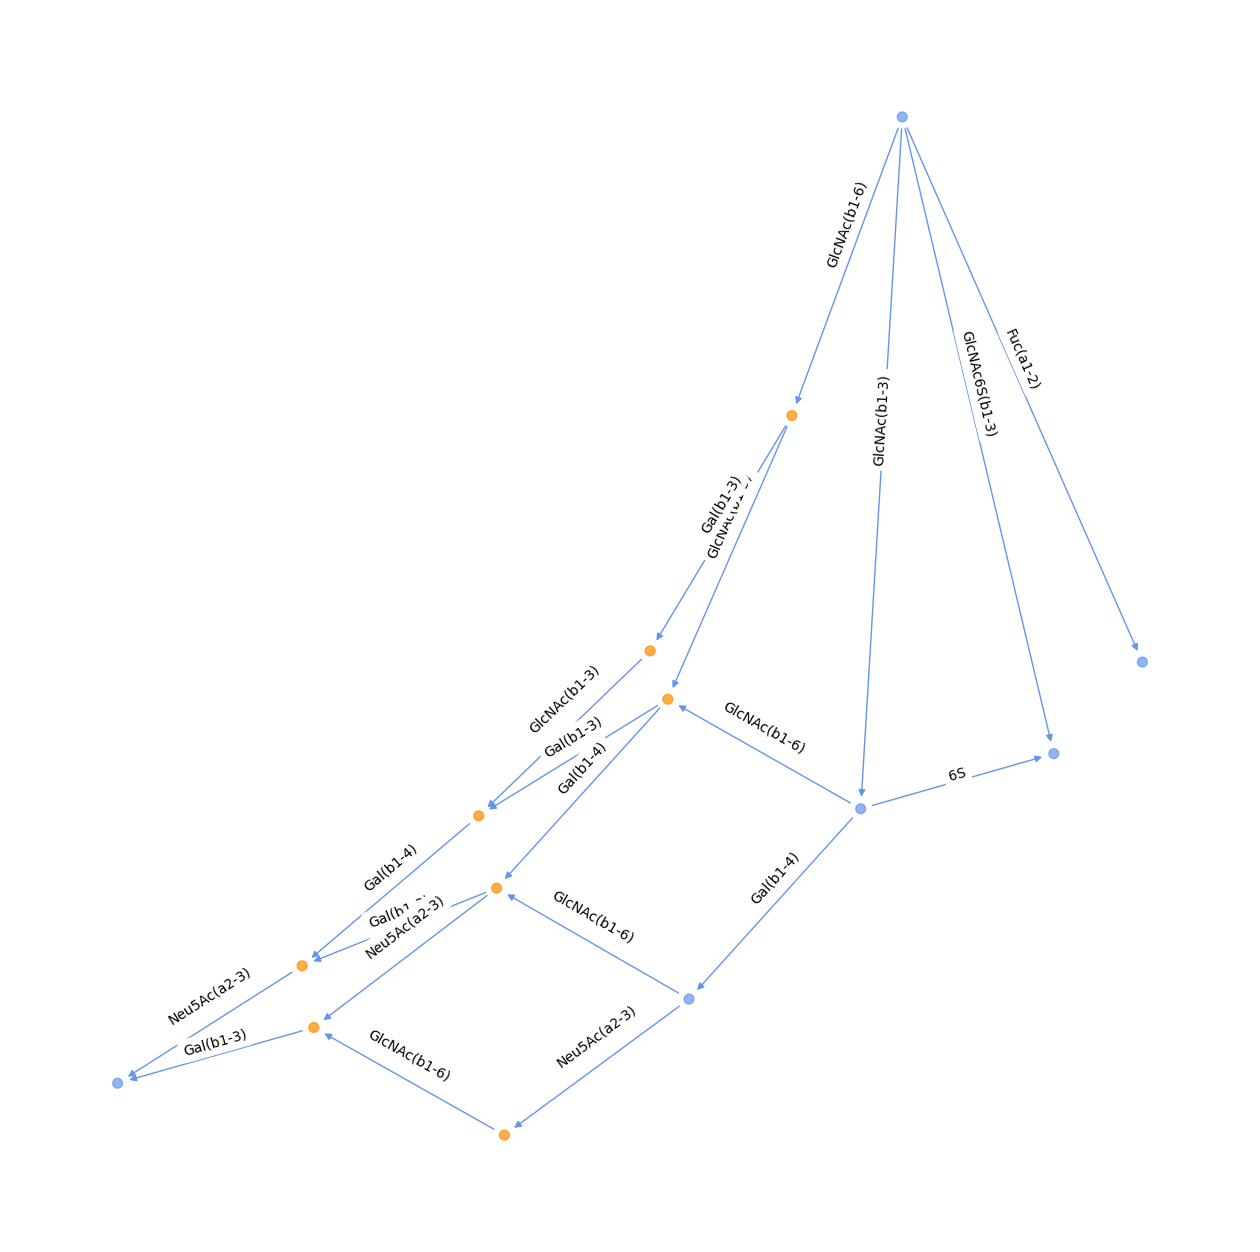

In [ ]:
plot_network(network, plot_format = 'kamada_kawai')

In [3]:
#| echo: false
#| output: asis
show_doc(find_diff)

---

### find_diff

>      find_diff (glycan_a, glycan_b, graph_dic)

finds the subgraph that differs between glycans and returns it, will only work if the differing subgraph is connected

| Arguments:
| :-
| glycan_a (networkx): glycan graph as networkx object
| glycan_b (networkx): glycan graph as networkx object
| graph_dic (dict): dictionary of form glycan : glycan-graph

| Returns:
| :-
| Returns difference between glycan_a and glycan_b in IUPAC-condensed

In [ ]:
glycans = ['Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
         'Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc']
graph_dic = {k:glycan_to_nxGraph(k) for k in glycans}
find_diff(glycans[0], glycans[1], graph_dic)

'Fuc(a1-6)'

In [4]:
#| echo: false
#| output: asis
show_doc(get_virtual_nodes)

---

### get_virtual_nodes

>      get_virtual_nodes (glycan, graph_dic, min_size=1)

find unobserved biosynthetic precursors of a glycan

| Arguments:
| :-
| glycan (string): glycan in IUPAC-condensed format
| graph_dic (dict): dictionary of form glycan : glycan-graph
| min_size (int): length of smallest root in biosynthetic network; default:1

| Returns:
| :-
| (1) list of virtual node graphs
| (2) list of virtual nodes in IUPAC-condensed format

In [ ]:
glycan = 'Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc-ol'
get_virtual_nodes(glycan, {glycan:glycan_to_nxGraph(glycan)})

([<networkx.classes.graph.Graph>,
  <networkx.classes.graph.Graph>,
  <networkx.classes.graph.Graph>],
 ['Man(a1-6)Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc-ol',
  'Man(a1-3)Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc-ol',
  'Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc-ol'])

In [5]:
#| echo: false
#| output: asis
show_doc(find_shared_virtuals)

---

### find_shared_virtuals

>      find_shared_virtuals (glycan_a, glycan_b, graph_dic, min_size=1)

finds virtual nodes that are shared between two glycans (i.e., that connect these two glycans)

| Arguments:
| :-
| glycan_a (string): glycan in IUPAC-condensed format
| glycan_b (string): glycan in IUPAC-condensed format
| graph_dic (dict): dictionary of form glycan : glycan-graph
| min_size (int): length of smallest root in biosynthetic network; default:1

| Returns:
| :-
| Returns list of edges between glycan and virtual node (if virtual node connects the two glycans)

In [ ]:
glycans = ['GlcNAc(b1-2)Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc-ol',
                    'GlcNAc(b1-2)Man(a1-6)[Man(a1-3)]Man(b1-4)GlcNAc(b1-4)GlcNAc-ol']
graph_dic = {k:glycan_to_nxGraph(k) for k in glycans}
find_shared_virtuals(glycans[0], glycans[1], graph_dic)

[('GlcNAc(b1-2)Man(a1-6)[Man(a1-3)]Man(b1-4)GlcNAc(b1-4)GlcNAc-ol',
  'Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc-ol'),
 ('GlcNAc(b1-2)Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc-ol',
  'Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc-ol')]

In [6]:
#| echo: false
#| output: asis
show_doc(find_shortest_path)

---

### find_shortest_path

>      find_shortest_path (goal_glycan, glycan_list, graph_dic,
>                          permitted_roots={'Gal(b1-4)GlcNAc-ol', 'Gal(b1-4)Glc-
>                          ol'}, min_size=1)

finds the glycan with the shortest path via virtual nodes to the goal glycan

| Arguments:
| :-
| goal_glycan (string): glycan in IUPAC-condensed format
| glycan_list (list): list of glycans in IUPAC-condensed format
| graph_dic (dict): dictionary of form glycan : glycan-graph
| permitted_roots (set): which nodes should be considered as roots; default:["Gal(b1-4)Glc-ol", "Gal(b1-4)GlcNAc-ol"]
| min_size (int): length of smallest root in biosynthetic network; default:1

| Returns:
| :-
| (1) list of edges of shortest path to connect goal_glycan and glycan via virtual nodes
| (2) dictionary of edge labels detailing difference between two connected nodes in shortest path

In [ ]:
glycans = ['Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)Glc-ol', 'Gal(b1-4)Glc-ol', 'Gal(b1-4)GlcNAc-ol']
graph_dic = {k:glycan_to_nxGraph(k) for k in glycans}
find_shortest_path(glycans[0], glycans[1:], graph_dic)

([('Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)Glc-ol', 'GlcNAc(b1-3)Gal(b1-4)Glc-ol'),
  ('GlcNAc(b1-3)Gal(b1-4)Glc-ol', 'Gal(b1-4)Glc-ol')],
 {('Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)Glc-ol',
   'GlcNAc(b1-3)Gal(b1-4)Glc-ol'): 'Gal(b1-4)',
  ('GlcNAc(b1-3)Gal(b1-4)Glc-ol', 'Gal(b1-4)Glc-ol'): 'GlcNAc(b1-3)'})

In [7]:
#| echo: false
#| output: asis
show_doc(infer_network)

---

### infer_network

>      infer_network (network, network_species, species_list, network_dic)

replaces virtual nodes if they are observed in other species

| Arguments:
| :-
| network (networkx object): biosynthetic network that should be inferred
| network_species (string): species from which the network stems
| species_list (list): list of species to compare network to
| network_dic (dict): dictionary of form species name : biosynthetic network (gained from construct_network)

| Returns:
| :-
| Returns network with filled in virtual nodes

In [8]:
#| echo: false
#| output: asis
show_doc(retrieve_inferred_nodes)

---

### retrieve_inferred_nodes

>      retrieve_inferred_nodes (network, species=None)

returns the inferred virtual nodes of a network that has been used with infer_network

| Arguments:
| :-
| network (networkx object): biosynthetic network with inferred virtual nodes
| species (string): species from which the network stems (only relevant if multiple species in network); default:None

| Returns:
| :-
| Returns inferred nodes as list or dictionary (if species argument is used)

In [9]:
#| echo: false
#| output: asis
show_doc(update_network)

---

### update_network

>      update_network (network_in, edge_list, edge_labels=None,
>                      node_labels=None)

updates a network with new edges and their labels

| Arguments:
| :-
| network (networkx object): network that should be modified
| edge_list (list): list of edges as node tuples
| edge_labels (list): list of edge labels as strings
| node_labels (dict): dictionary of form node:0 or 1 depending on whether the node is observed or virtual

| Returns:
| :-
| Returns network with added edges

In [10]:
#| echo: false
#| output: asis
show_doc(trace_diamonds)

---

### trace_diamonds

>      trace_diamonds (network, species_list, network_dic, threshold=0.0,
>                      nb_intermediates=2)

extracts diamond-shape motifs from biosynthetic networks (A->B,A->C,B->D,C->D) and uses evolutionary information to determine which path is taken from A to D

| Arguments:
| :-
| network (networkx object): biosynthetic network, returned from construct_network
| species_list (list): list of species to compare network to
| network_dic (dict): dictionary of form species name : biosynthetic network (gained from construct_network)
| threshold (float): everything below or equal to that threshold will be cut; default:0.
| nb_intermediates (int): number of intermediate nodes expected in a network motif to extract; has to be a multiple of 2 (2: diamond, 4: hexagon,...)

| Returns:
| :-
| Returns dataframe of each intermediary glycan and its proportion (0-1) of how often it has been experimentally observed in this path

In [11]:
#| echo: false
#| output: asis
show_doc(evoprune_network)

---

### evoprune_network

>      evoprune_network (network, network_dic=None, species_list=None,
>                        node_attr='abundance', threshold=0.01,
>                        nb_intermediates=2)

given a biosynthetic network, this function uses evolutionary relationships to prune impossible paths

| Arguments:
| :-
| network (networkx object): biosynthetic network, returned from construct_network
| network_dic (dict): dictionary of form species name : biosynthetic network (gained from construct_network); default:pre-computed milk networks
| species_list (list): list of species to compare network to; default:species from pre-computed milk networks
| node_attr (string): which (numerical) node attribute to use for pruning; default:'abundance'
| threshold (float): everything below or equal to that threshold will be cut; default:0.01
| nb_intermediates (int): number of intermediate nodes expected in a network motif to extract; has to be a multiple of 2 (2: diamond, 4: hexagon,...)

| Returns:
| :-
| Returns pruned network (with virtual node probability as a new node attribute)

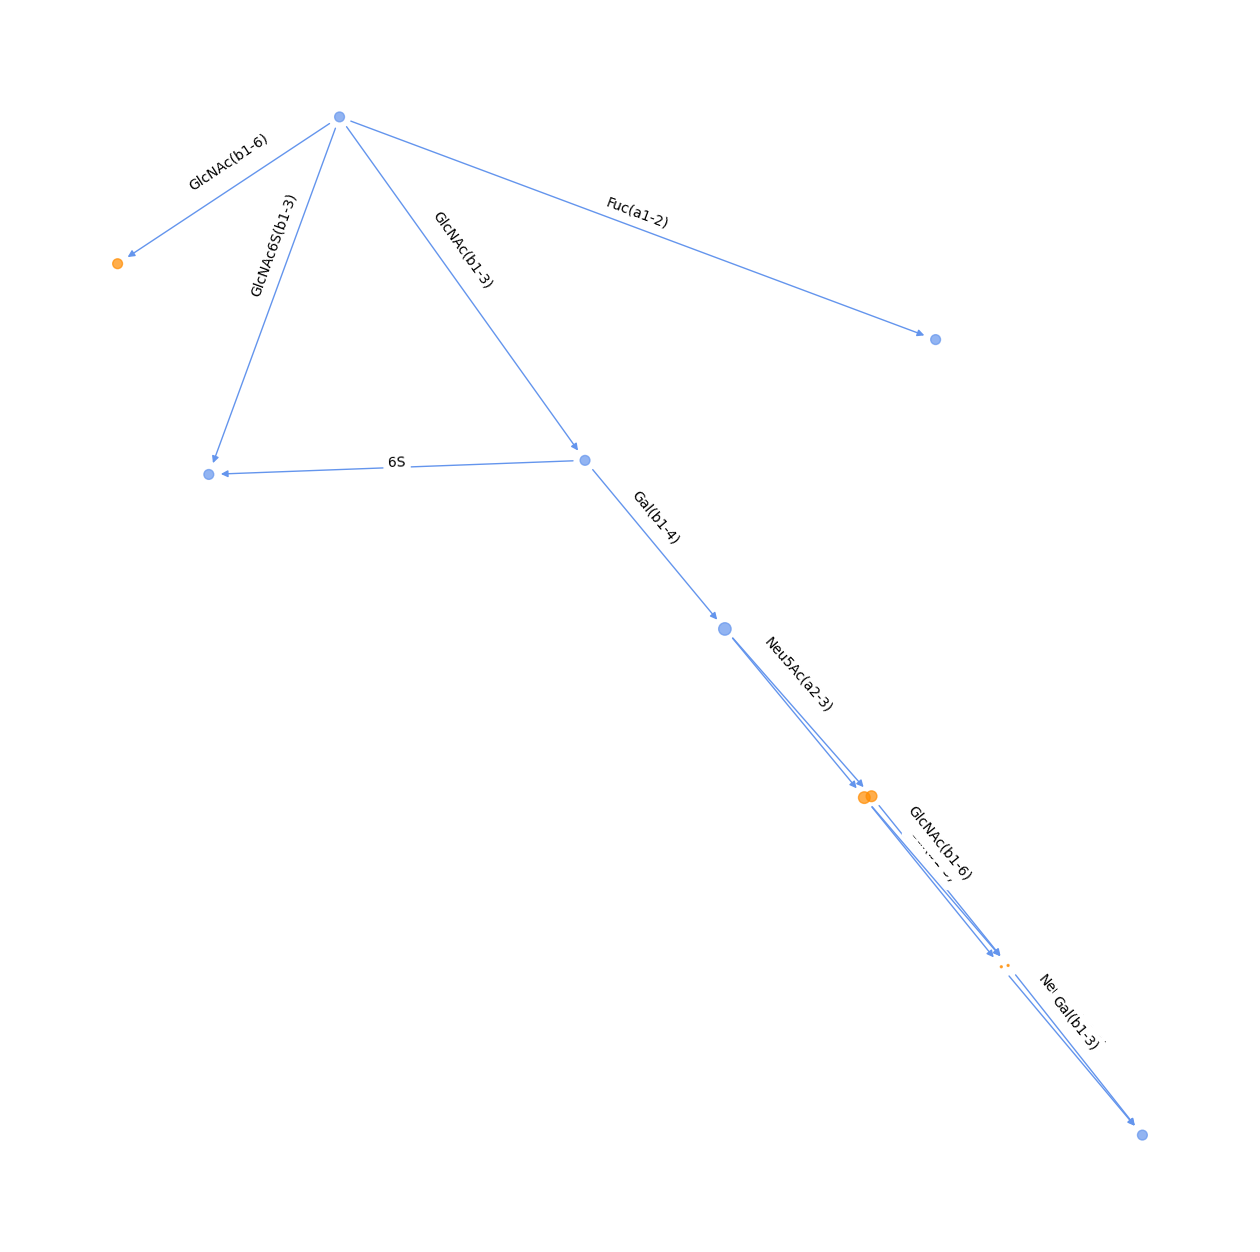

In [ ]:
plot_network(evoprune_network(network), plot_format = 'kamada_kawai')

In [12]:
#| echo: false
#| output: asis
show_doc(highlight_network)

---

### highlight_network

>      highlight_network (network, highlight, motif=None, abundance_df=None,
>                         glycan_col='glycan', intensity_col='rel_intensity',
>                         conservation_df=None, network_dic=None, species=None)

highlights a certain attribute in the network that will be visible when using plot_network

| Arguments:
| :-
| network (networkx object): biosynthetic network, returned from construct_network
| highlight (string): which attribute to highlight (choices are 'motif' for glycan motifs, 'abundance' for glycan abundances, 'conservation' for glycan conservation, 'species' for highlighting 1 species in multi-network)
| motif (string): highlight=motif; which motif to highlight (absence/presence, in violet/green); default:None
| abundance_df (dataframe): highlight=abundance; dataframe containing glycans and their relative intensity
| glycan_col (string): highlight=abundance; column name of the glycans in abundance_df
| intensity_col (string): highlight=abundance; column name of the relative intensities in abundance_df
| conservation_df (dataframe): highlight=conservation; dataframe containing glycans from different species
| network_dic (dict): highlight=conservation/species; dictionary of form species name : biosynthetic network (gained from construct_network); default:pre-computed milk networks
| species (string): highlight=species; which species to highlight in a multi-species network

| Returns:
| :-
| Returns a network with the additional 'origin' (motif/species) or 'abundance' (abundance/conservation) node attribute storing the highlight

In [13]:
#| echo: false
#| output: asis
show_doc(export_network)

---

### export_network

>      export_network (network, filepath, other_node_attributes=[])

converts NetworkX network into files usable, e.g., by Cytoscape or Gephi

| Arguments:
| :-
| network (networkx object): biosynthetic network, returned from construct_network
| filepath (string): should describe a valid path + file name prefix, will be appended by file description and type
| other_node_attributes (list): string names of node attributes that should also be extracted; default:[]

| Returns:
| :-
| (1) saves a .csv dataframe containing the edge list and edge labels
| (2) saves a .csv dataframe containing node IDs and labels

In [14]:
#| echo: false
#| output: asis
show_doc(get_maximum_flow)

---

### get_maximum_flow

>      get_maximum_flow (network, source='Gal(b1-4)Glc-ol', sinks=[])

estimate maximum flow and flow paths between source and sinks

| Arguments:
| :-
| network (networkx object): biosynthetic network, returned from construct_network
| source (string): usually the root node of network; default:"Gal(b1-4)Glc-ol"
| sinks (list of strings): specified sinks to estimate flow for; default:all terminal nodes

| Returns:
| :-
| Returns a dictionary of type sink : {maximum flow value, flow path dictionary}

In [15]:
#| echo: false
#| output: asis
show_doc(get_max_flow_path)

---

### get_max_flow_path

>      get_max_flow_path (network, flow_dict, sink, source='Gal(b1-4)Glc-ol')

get the actual path between source and sink that gave rise to the maximum flow value

| Arguments:
| :-
| network (networkx object): biosynthetic network, returned from construct_network
| flow_dict (dict): dictionary of type source : {sink : flow} as returned by get_maximum_flow
| sink (string): specified sink to retrieve maximum flow path
| source (string): usually the root node of network; default:"Gal(b1-4)Glc-ol"

| Returns:
| :-
| Returns a list of (source, sink) tuples describing the maximum flow path

In [16]:
#| echo: false
#| output: asis
show_doc(get_reaction_flow)

---

### get_reaction_flow

>      get_reaction_flow (network, res, aggregate=None)

get the aggregated flows for a type of reaction across entire network

| Arguments:
| :-
| network (networkx object): biosynthetic network, returned from construct_network
| res (dict): dictionary of type sink : {maximum flow value, flow path dictionary} as returned by get_maximum_flow
| aggregate (string): if reaction flow values should be aggregated, options are "sum" and "mean"; default:None

| Returns:
| :-
| Returns a dictionary of form reaction : flow(s)

In [17]:
#| echo: false
#| output: asis
show_doc(get_differential_biosynthesis)

---

### get_differential_biosynthesis

>      get_differential_biosynthesis (df, group1, group2, analysis='reaction',
>                                     paired=False)

compares biosynthetic patterns between glycomes of two conditions

| Arguments:
| :-
| df (dataframe): dataframe containing glycan sequences in first column and relative abundances in subsequent columns [alternative: filepath to .csv]
| group1 (list): list of column indices or names for the first group of samples, usually the control
| group2 (list): list of column indices or names for the second group of samples
| analysis (string): what type of analysis to perform on networks, options are "reaction" for reaction type fluxes and "flow" for comparing flow to sinks; default:"reaction"
| paired (bool): whether samples are paired or not (e.g., tumor & tumor-adjacent tissue from same patient); default:False

| Returns:
| :-
| Returns a dataframe with:
| (i) Differential flow features
| (ii) Their mean abundance across all samples in group1 + group2
| (iii) Log2-transformed fold change of group2 vs group1 (i.e., negative = lower in group2)
| (iv) Uncorrected p-values (Welch's t-test) for difference in mean
| (v) Effect size as Cohen's d

## evolution
>investigating evolutionary relationships of glycans

In [18]:
#| echo: false
#| output: asis
show_doc(distance_from_embeddings)

---

### distance_from_embeddings

>      distance_from_embeddings (df, embeddings, cut_off=10, rank='Species',
>                                averaging='median')

calculates a cosine distance matrix from learned embeddings

| Arguments:
| :-
| df (dataframe): dataframe with glycans as rows and taxonomic information as columns
| embeddings (dataframe): dataframe with glycans as rows and learned embeddings as columns (e.g., from glycans_to_emb)
| cut_off (int): how many glycans a rank (e.g., species) needs to have at least to be included; default:10
| rank (string): which taxonomic rank to use for grouping organisms; default:'Species'
| averaging (string): how to average embeddings, by 'median' or 'mean'; default:'median'

| Returns:
| :-
| Returns a rank x rank distance matrix

In [19]:
#| echo: false
#| output: asis
show_doc(distance_from_metric)

---

### distance_from_metric

>      distance_from_metric (df, networks, metric='Jaccard', cut_off=10,
>                            rank='Species')

calculates a distance matrix of generated networks based on provided metric

| Arguments:
| :-
| df (dataframe): dataframe with glycans as rows and taxonomic information as columns
| networks (list): list of networks in networkx format
| metric (string): which metric to use, available: 'Jaccard'; default:'Jaccard'
| cut_off (int): how many glycans a rank (e.g., species) needs to have at least to be included; default:10
| rank (string): which taxonomic rank to use for grouping organisms; default:'Species'

| Returns:
| :-
| Returns a rank x rank distance matrix

In [20]:
#| echo: false
#| output: asis
show_doc(dendrogram_from_distance)

---

### dendrogram_from_distance

>      dendrogram_from_distance (dm, ylabel='Mammalia', filepath='')

plots a dendrogram from distance matrix

| Arguments:
| :-
| dm (dataframe): a rank x rank distance matrix (e.g., from distance_from_embeddings)
| ylabel (string): how to label the y-axis of the dendrogram; default:'Mammalia'
| filepath (string): absolute path including full filename allows for saving the plot

In [21]:
#| echo: false
#| output: asis
show_doc(check_conservation)

---

### check_conservation

>      check_conservation (glycan, df, network_dic=None, rank='Order',
>                          threshold=5, motif=False)

estimates evolutionary conservation of glycans and glycan motifs via biosynthetic networks

| Arguments:
| :-
| glycan (string): full glycan or glycan motif in IUPAC-condensed nomenclature
| df (dataframe): dataframe in the style of df_species, each row one glycan and columns are the taxonomic levels
| network_dic (dict): dictionary of form species name : biosynthetic network (gained from construct_network); default:pre-computed milk networks
| rank (string): at which taxonomic level to assess conservation; default:Order
| threshold (int): threshold of how many glycans a species needs to have to consider the species;default:5
| motif (bool): whether glycan is a motif (True) or a full sequence (False); default:False

| Returns:
| :-
| Returns a dictionary of taxonomic group : degree of conservation

In [22]:
#| echo: false
#| output: asis
show_doc(get_communities)

---

### get_communities

>      get_communities (graph_list, label_list=None)

Find communities for each graph in a list of graphs

| Arguments:
| :-
| graph_list (list): list of undirected biosynthetic networks, in the form of networkx objects
| label_list (list): labels to create the community names, which are running_number + _ + label[k]  for graph_list[k]; default:range(len(graph_list))

| Returns:
| :-
| Returns a merged dictionary of community : glycans in that community